In [1]:
%matplotlib inline
import copy
import networkx as nx
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

In [2]:
def powerlaw(D, lamb, p0):
    x = np.arange(1,D)
    x = np.asarray(x, dtype=float)
    x = x**(-lamb)
    x = x/x.sum(axis=0)*(1-p0)
    x = np.insert(x, 0, p0, axis=0)
    return x

In [150]:
N = 100
D = 20
B = 25
q = 0.05

lambi = 1.2
lambo = 1.2 
win = 10
wou = 0.001

In [151]:
din = np.random.choice(np.arange(D), N, replace=True, p=powerlaw(D,lambi, 0.0))
diff = 10000
while diff > 0:
    dou = np.random.choice(np.arange(D), N, replace=True, p=powerlaw(D,lambo, 0.0))
    diff = abs(din.sum() - dou.sum())

In [152]:
node2Group = np.repeat(np.arange(B), N/B)
edges = dou.sum()
out_order = np.zeros([edges])
out_order = np.asarray(out_order, dtype=int)
s = 0

for node in range(N):   
    out_order[range(s, s+dou[node])] = [node]*dou[node]
    s = s+dou[node]

    
np.random.shuffle(out_order)   

In [153]:
#plt.plot(np.arange(D), powerlaw(D, lambo, 0.0))

In [154]:
G = nx.DiGraph()
dintemp = np.asarray(copy.deepcopy(din), dtype=float)

for e in range(edges):
    n = out_order[e] #outnode
    g = node2Group[n] #group to which out node belongs
    nodedist = copy.deepcopy(dintemp)
    nodedist[node2Group == g] = nodedist[node2Group == g]*win
    nodedist[node2Group != g] = nodedist[node2Group != g]*wou
    nodedist = nodedist/nodedist.sum()
    nodes = np.arange(N)
    destination = int(np.random.choice(nodes, 1, replace=False, p = nodedist))
    
    G.add_edge(n, destination)
    dintemp[destination] = dintemp[destination] -1

G=nx.DiGraph(G)
G.remove_edges_from(G.selfloop_edges())

In [155]:
#nx.draw(G, pos=nx.shell_layout(G), node_size = 10, linewidths=0, width = 0.2)

In [156]:
T = 3000
trialresult = np.empty([T])
for trial in range(T):
    infected = set(np.random.choice(range(N), int(q*N),replace=False))
    clean = set(np.arange(N)) - infected
    infecsize = np.zeros(N)
    for step in range(N):
        infecsize[step] = len(infected)/N
        downstream = set()
        for n in infected:
            downstream.update(set(G.successors(n)))

        H = G.to_directed()
        H.remove_nodes_from(infected)
        hscc = nx.strongly_connected_components_recursive(H)


        shoreparty = set()
        for comp in hscc:
            if len(set.intersection(comp, downstream))>0:
                shoreparty.update(comp)
                #infected.update(comp)

        H.remove_nodes_from(shoreparty)
        hscc2 = nx.strongly_connected_components_recursive(H)
        for g in range(B):
            cleangroup = set(np.where(node2Group ==g)[0]) - shoreparty - infected
            if len(cleangroup) > 0:
                for comp in hscc2:
                    if cleangroup == comp:
                        infected = infected | set(np.where(node2Group ==g)[0])
                        clean = clean - set(np.where(node2Group ==g)[0])
                        break
            elif len(cleangroup) == 0:
                infected = infected | set(np.where(node2Group ==g)[0])
                clean = clean - set(np.where(node2Group ==g)[0])
    trialresult[trial] = infecsize[N-1]

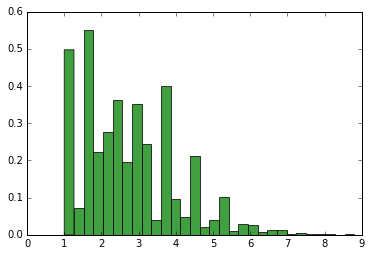

In [157]:
n, bins, patches = plt.hist(trialresult/q, 30, normed=1, facecolor='green', alpha=0.75)


In [108]:
# planted partition
gg = [None]*B
dg = [None]*B
for g in range(B):
    gg[g] = np.where(node2Group ==g)[0] #node labels of node in group
    dg[g] = din[gg[g]] # degree of nodes in group

Group2node = dict(zip(range(B), gg)) 
    
adj = np.zeros([N,N])
win = 0.8
wou = 0.1

In [ ]:
len(infected)